## Problem Statement:
#### I have upoladed a dataset containing information about the passengers of the Titanic. 
#### I have implemented various task is to perform exploratory data analysis (EDA) on the dataset using the following methods:


##### ● Load the dataset(Titanic.csv) into a pandas dataframe and print the first 5 rows using the head() method.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("Titanic.csv") #reading my dataset

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### ● Use the info() method to get information about the dataset. In particular, pay attention to the data types of each column and whether there are any missing values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum() 
# display sum of null values, as it is shown age and cabin, embarked column has null values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

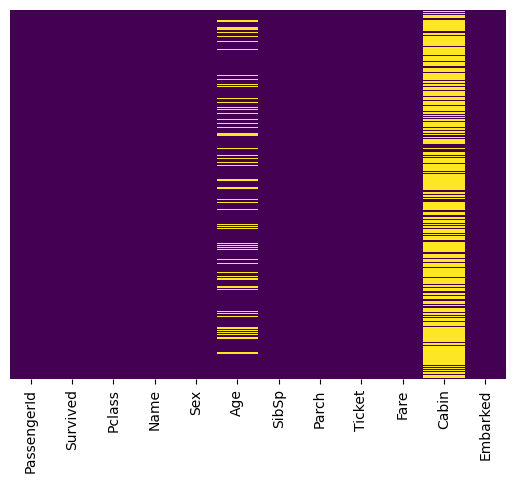

In [6]:
sns.heatmap(data.isnull(),yticklabels= False, cbar= False,cmap="viridis" ) 
#plot null values in heatmap graph, cabin has more density of null values as compared to Age.

In [7]:
data.drop('Cabin',axis=1,inplace=True) 
#drop cabin column as it has maximum number of null values,and not required for analysis

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

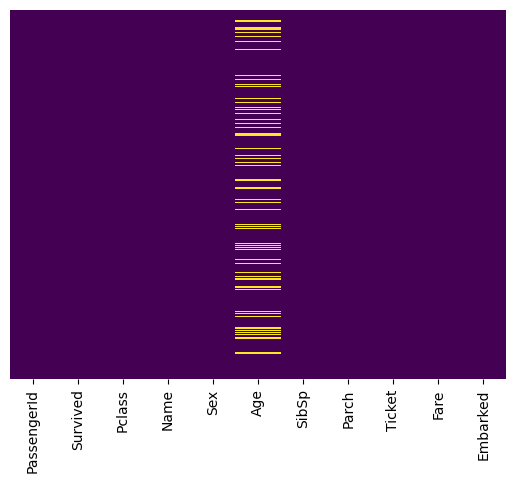

In [9]:
sns.heatmap(data.isnull(),yticklabels= False, cbar= False,cmap="viridis" ) 
# heatmap graph of null values in Age column only, because Cabin is droped before. 

In [10]:
dataFrameAge = data[['Age']] 
#create new data frame from Age column to calculate median,mean and interpolate.

In [11]:
dataFrameAge

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [12]:
dataFrameAge['age_mean'] = dataFrameAge['Age'].fillna(data['Age'].mean())
dataFrameAge['age_median'] = dataFrameAge['Age'].fillna(data['Age'].median())
dataFrameAge['age_interpolate'] = data['Age'].interpolate()

/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3270/692184114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrameAge['age_mean'] = dataFrameAge['Age'].fillna(data['Age'].mean())
/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3270/692184114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrameAge['age_median'] = dataFrameAge['Age'].fillna(data['Age'].median())
/var/folders/4d/9g268cqn2h96mn600l12gfhr0000gn/T/ipykernel_3270/692184114.py:3: SettingWithCopyWarning: 
A v

In [13]:
 dataFrameAge.std()
# standard Deviation of Age Mean column is less as compared to median, and interpolate..
# thus we use Mean of age to replace null values in original data frame. 

Age                14.526497
age_mean           13.002015
age_median         13.019697
age_interpolate    13.902353
dtype: float64

In [14]:
data['Age'] = data['Age'].fillna(data['Age'].mean()) 
# modifing original data frame with mean of age column.

<Axes: >

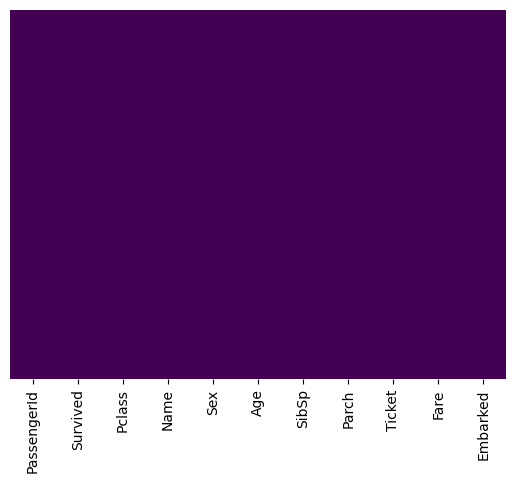

In [15]:
sns.heatmap(data.isnull(),yticklabels= False, cbar= False,cmap="viridis" ) 
# thus this heat map graph represent there is no null values in age column as well

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

##### ● Use the describe() method to describe the dataset. Pay attention to the range of values for each numeric column and whether there are any outliers.

In [17]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### ● Use the groupby() method to group the data based on the Pclass column and calculate the mean fare for each class

In [18]:
dataFramePclass = data.groupby('Pclass')

In [19]:
dataFramePclass.describe()

PassengerId                                                             \
             count        mean         std   min     25%    50%    75%    max   
Pclass                                                                          
1            216.0  461.597222  246.737616   2.0  270.75  472.0  670.5  890.0   
2            184.0  445.956522  250.852161  10.0  234.50  435.5  668.0  887.0   
3            491.0  439.154786  264.441453   1.0  200.00  432.0  666.5  891.0   

       Survived            ... Parch        Fare                             \
          count      mean  ...   75%  max  count       mean        std  min   
Pclass                     ...                                                
1         216.0  0.629630  ...   0.0  4.0  216.0  84.154687  78.380373  0.0   
2         184.0  0.472826  ...   1.0  3.0  184.0  20.662183  13.417399  0.0   
3         491.0  0.242363  ...   0.0  6.0  491.0  13.675550  11.778142  0.0   

                                           
             25%      50%   75%       max  
Pclass                                     
1       30.92395  60.2875  93.5  512.3292  
2       13.00000  14.2500  26.0   73.5000  
3        7.75000   8.0500  15.5   69.5500  

[3 rows x 48 columns]

In [20]:
dataFramePclass['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<Axes: xlabel='Pclass'>

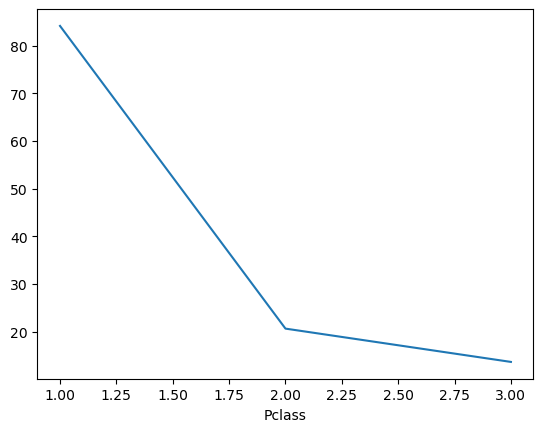

In [21]:
data.groupby('Pclass')['Fare'].mean().plot() 
# plot the mean fare with respect to group by Pclass. 

##### ● Use the value_counts() method to get the frequency count of the Embarked column.

In [22]:
data[['Embarked']].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

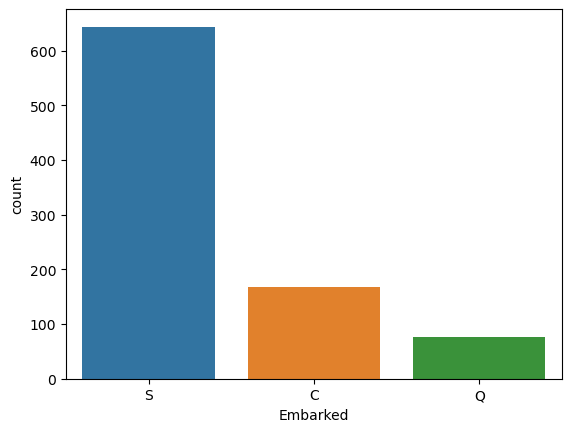

In [23]:
sns.countplot(x='Embarked',data=data)

##### ● Create a new column in the dataframe called AgeRange that categorises passengers into age ranges: "Child" for ages 0-12, "Teen" for ages 13-19, "Adult" for ages 20-59, and "Senior" for ages 60 and above.

In [24]:
data.loc[data['Age']<=13, 'AgeRange'] = 'Child'
data.loc[data['Age'].between(13,19), 'AgeRange'] = 'Teen'
data.loc[data['Age'].between(20,59), 'AgeRange'] = 'Adult'
data.loc[data['Age']>59, 'AgeRange'] = 'Senior'
# these statements categories passengers into different age ranges as per our requirement.

In [25]:
data['AgeRange'].value_counts()

Adult     701
Teen       95
Child      69
Senior     26
Name: AgeRange, dtype: int64

##### ● Use the pivot_table() method to create a pivot table that shows the survival rate of passengers based on their sex, class, and age range.

In [26]:
pivotTable = pd.pivot_table(data,index=['Sex','Pclass','AgeRange'],values=['Survived'], 
                            aggfunc=np.mean)
pivotTable

Survived
Sex    Pclass AgeRange          
female 1      Adult     0.974026
              Child     0.000000
              Senior    1.000000
              Teen      1.000000
       2      Adult     0.900000
              Child     1.000000
              Teen      1.000000
       3      Adult     0.479592
              Child     0.478261
              Senior    1.000000
              Teen      0.590909
male   1      Adult     0.386139
              Child     1.000000
              Senior    0.142857
              Teen      0.250000
       2      Adult     0.070588
              Child     1.000000
              Senior    0.250000
              Teen      0.100000
       3      Adult     0.125000
              Child     0.360000
              Senior    0.000000
              Teen      0.078947

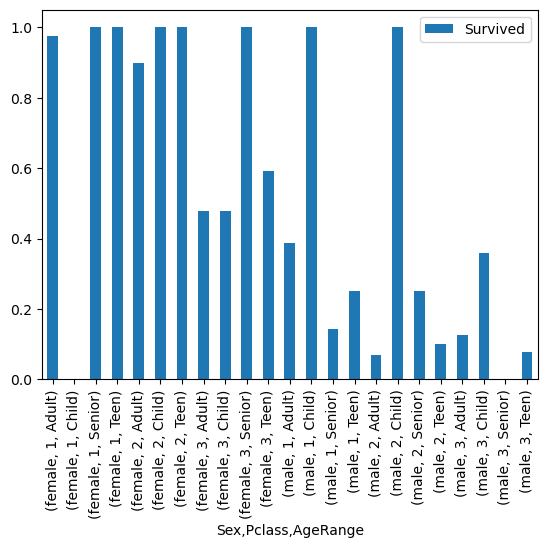

In [27]:
pivotTable.plot(kind='bar');

###### ● Create a bar chart that shows the total number of passengers in each age range.

In [28]:
age_count = data.groupby('AgeRange').size()
age_count = age_count.sort_values(ascending=True)
# sort series object to get values in specific order

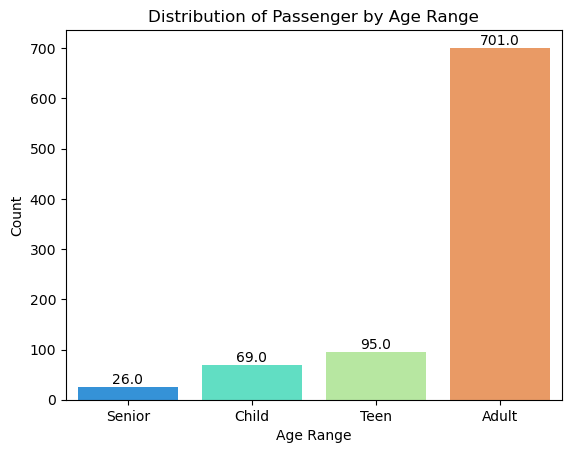

In [29]:
ax = sns.barplot(x = age_count.index, y =age_count.values, palette= 'rainbow')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
               ha="center", va ="center", xytext = (0,5), textcoords="offset points")
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Distribution of Passenger by Age Range')
plt.show()

In [30]:
data["AgeGroup"] = pd.cut(data.Age, bins=[0,12,19,59,100], labels=["0-12","13-19", "20-59","60-100"]) 
ageGroupCount = data.groupby('AgeGroup').size()
ageGroupCount = ageGroupCount.sort_values(ascending=True) 
# sort series object to get values in specific order
ageGroupCount

AgeGroup
60-100     26
0-12       69
13-19      95
20-59     701
dtype: int64

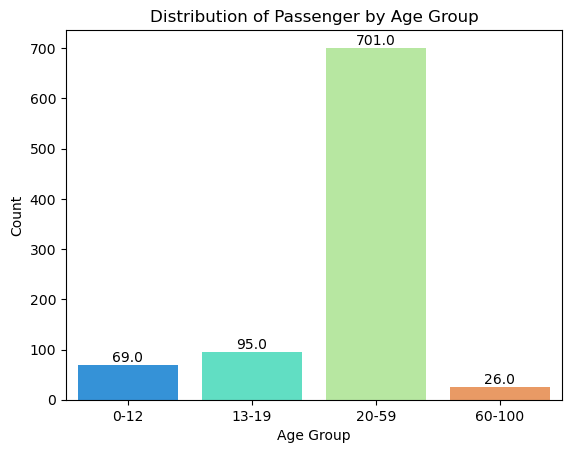

In [31]:
ax = sns.barplot(x = ageGroupCount.index, y =ageGroupCount.values, palette= 'rainbow')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
               ha="center", va ="center", xytext = (0,5), textcoords="offset points")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Passenger by Age Group')
plt.show()

##### ● Create a scatter plot that shows the relationship between age and fare. Color the points based on whether the passenger survived or not.

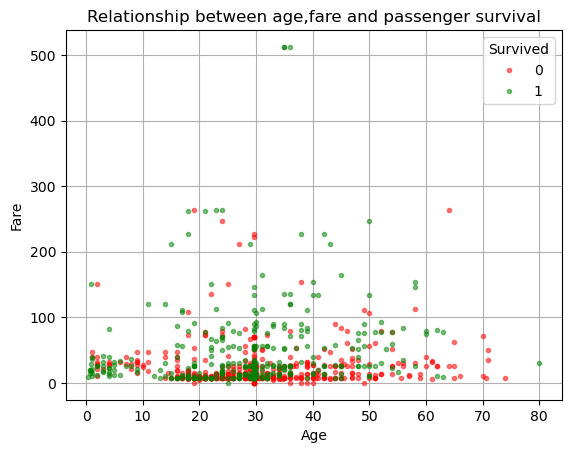

In [32]:
fig, ax = plt.subplots()
color = ['red', 'green'] # set color of legend points

count = 0
for name, group in data.groupby('Survived'):
    ax.plot(group.Age, group.Fare, '.', 
                           label = name, alpha = 0.5, 
                           c = color[count])
    count += 1

# set legend
ax.legend(numpoints=1, title = "Survived", fontsize = 10)

# set axis labels 
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between age,fare and passenger survival')
ax.grid(True)  # display grid view
plt.show(fig) 